<a href="https://colab.research.google.com/github/afloradda/afloradda/blob/main/Desafio_Python_Frequencias_Medias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import os

# Depuração sobre os arquivos ('FileNotFoundError: File enem_2003.json does not exist')
print(os.listdir()) # Escrevi o nome do arquivo errado por isso não estava encontrando.


['.config', 'enem_2023.json', 'sample_data']


In [8]:
df = pd.read_json("enem_2023.json")

In [9]:
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


### 1. Qual das disciplinas tem a maior amplitude de nota?

A ***amplitude*** é a diferença entre o maior e o menor valor de um conjunto de dados. A fórmula para calcular é:

*Amplitude = Valor Máximo - Valor Mínimo*

In [11]:
disciplinas = df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']]

amplitude = disciplinas.max() - disciplinas.min()

disciplina_maior_amplitude = amplitude.idxmax()
maior_amplitude = amplitude.max()

In [12]:
print(f"A disciplina com a maior amplitude é {disciplina_maior_amplitude} com um valor de {maior_amplitude}.")

A disciplina com a maior amplitude é Redação com um valor de 729.1600351395.


### 2. Média e Mediana

In [13]:
medias = disciplinas.mean(skipna=True)
print(medias)

Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64


In [15]:
medianas = disciplinas.median(skipna=True)
print(medianas)

Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64


### 3. Considerando o curso de 'Ciência da Computação', da UFPE. Qual a média e o desvio padrão [...]

O ***desvio padrão*** é uma medida de dispersão que indica o quanto os valores de um conjunto de dados variam em relação à média.

In [16]:
pesos = {
    "Redação": 2,
    "Matemática e suas Tecnologias": 4,
    "Linguagens, Códigos e suas Tecnologias": 2,
    "Ciências Humanas e suas Tecnologias": 1,
    "Ciências da Natureza e suas Tecnologias": 1
}

In [17]:
df_UFPE_media = df.copy()

In [18]:
df_UFPE_media['Media Ponderada'] = (
    df_UFPE_media['Redação'] * pesos['Redação'] +
    df_UFPE_media['Matemática'] * pesos['Matemática e suas Tecnologias'] +
    df_UFPE_media['Linguagens'] * pesos['Linguagens, Códigos e suas Tecnologias'] +
    df_UFPE_media['Ciências humanas'] * pesos['Ciências Humanas e suas Tecnologias'] +
    df_UFPE_media['Ciências da natureza'] * pesos['Ciências da Natureza e suas Tecnologias']
) / sum(pesos.values())

In [19]:
df_top500 = df_UFPE_media.nlargest(500, 'Media Ponderada')

In [21]:
media_top500 = df_top500['Media Ponderada'].mean()

In [23]:
print(f"A média das notas dos 500 melhores estudantes é {media_top500:.2f}")

A média das notas dos 500 melhores estudantes é 557.29


In [22]:
desvio_padrao_top500 = df_top500['Media Ponderada'].std()

In [24]:
print(f"O desvio padrão das notas dos 500 melhores estudantes é {desvio_padrao_top500:.2f}")

O desvio padrão das notas dos 500 melhores estudantes é 40.44


### 4. Considerando que existem apenas 40 vagas: Qual seria a variância de média se todos os estudantes aplicassem para Ciência da Computação?

In [25]:
df_ordenado = df_UFPE_media.sort_values(by="Media Ponderada", ascending=False)

In [26]:
df_top40 = df_ordenado.head(40)

In [27]:
media_top40 = df_top40["Media Ponderada"].mean()

In [29]:
print(f"Média dos 40 aprovados: {media_top40:.2f}")

Média dos 40 aprovados: 636.68


In [28]:
variancia_top40 = df_top40["Media Ponderada"].var()

In [30]:
print(f"Variância das notas dos 40 aprovados: {variancia_top40:.2f}")

Variância das notas dos 40 aprovados: 295.77


### 5. Qual o valor do teto do terceito quartil para as disciplinas de matemática e linguagens?

In [32]:
q3_matematica = df['Matemática'].quantile(0.75)
print(f"Teto do terceiro quartil para Matemática: {q3_matematica:.2f}")

Teto do terceiro quartil para Matemática: 592.91


In [34]:
q3_linguagens = df['Linguagens'].quantile(0.75)
print(f"Teto do terceiro quartil para Linguagens: {q3_linguagens:.2f}")

Teto do terceiro quartil para Linguagens: 571.64


### 6 e 7. Histograma de Redação e Linguagens


O histograma mostra a distribuição de frequência das notas.

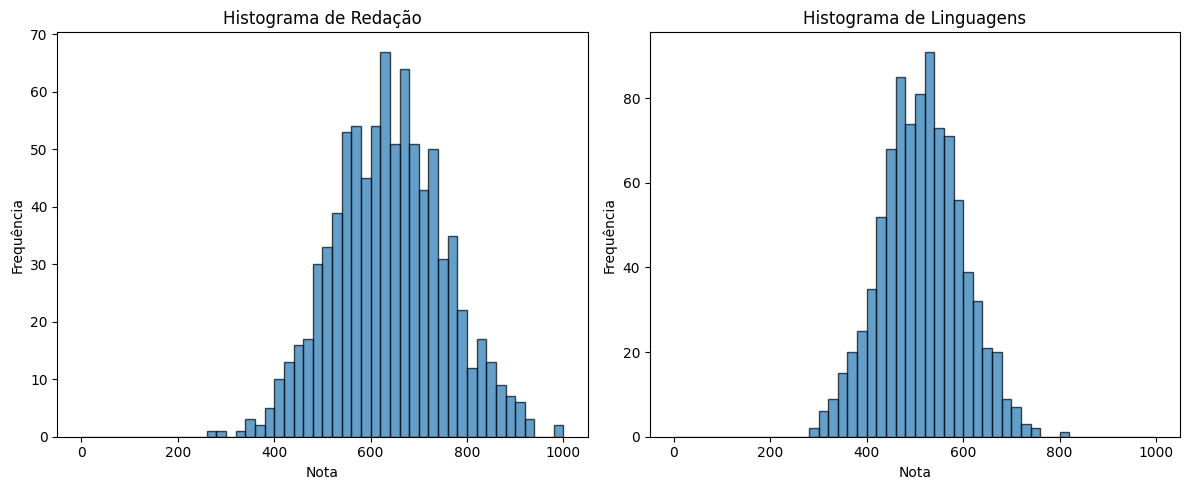

In [43]:
# Criando o histograma para Redação e Linguagens
plt.figure(figsize=(12, 5))

# Histograma para Redação
plt.subplot(1, 2, 1)  # Criando subplot 1 (linha 1, coluna 2, posição 1)
plt.hist(df['Redação'], bins=range(0, 1001, 20), edgecolor="black", alpha=0.7)
plt.title("Histograma de Redação")
plt.xlabel("Nota")
plt.ylabel("Frequência")

# Histograma para Linguagens
plt.subplot(1, 2, 2)  # Criando subplot 2 (linha 1, coluna 2, posição 2)
plt.hist(df['Linguagens'], bins=range(0, 1001, 20), edgecolor="black", alpha=0.7)
plt.title("Histograma de Linguagens")
plt.xlabel("Nota")
plt.ylabel("Frequência")

plt.tight_layout()  # Ajusta os gráficos para não sobreporem
plt.show()

### 8. Boxplot

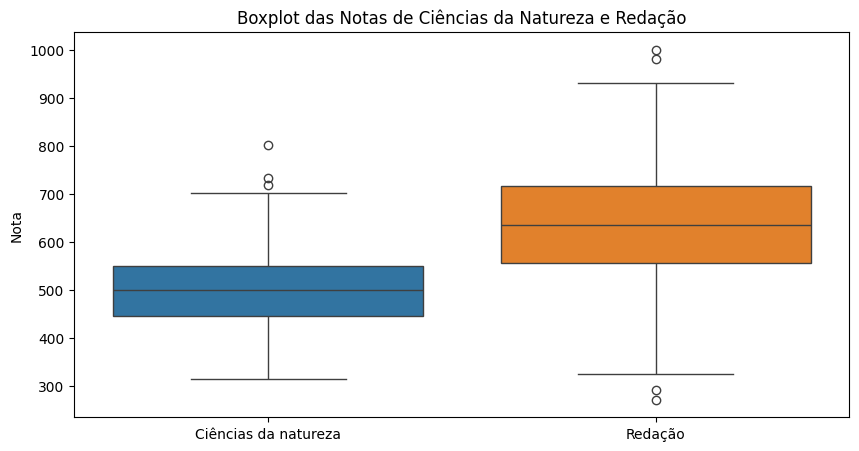

In [45]:
plt.figure(figsize=(10, 5))

# Criando o boxplot para Ciências da Natureza e Redação
sns.boxplot(data=df[['Ciências da natureza', 'Redação']])

plt.title("Boxplot das Notas de Ciências da Natureza e Redação")
plt.ylabel("Nota")
plt.show()

### 9. Identificação de remoção de outliers utilizando IQR

In [59]:
# Calculando as médias originais antes de remover os outliers
media_original = df[['Ciências da natureza', 'Redação']].mean()

# Remover os outliers com base no IQR
for col in ['Ciências da natureza', 'Redação']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

# Calculando a nova média após a remoção dos outliers
nova_media = df[['Ciências da natureza', 'Redação']].mean()

# Calculando a alteração percentual na média
alteracao_media = abs((nova_media - media_original) / media_original) * 100

print(f"Média original: \n{media_original}")
print(f"Nova média após remoção dos outliers: \n{nova_media}")

print(f"Alteração na média após remoção dos outliers:  \n{alteracao_media}")

Média original: 
Ciências da natureza    500.821707
Redação                 638.169482
dtype: float64
Nova média após remoção dos outliers: 
Ciências da natureza    500.821707
Redação                 638.169482
dtype: float64
Alteração na média após remoção dos outliers:  
Ciências da natureza    0.0
Redação                 0.0
dtype: float64


### 10. Comparação entre média, moda e mediana. Considerando valores nulos.

In [72]:
def preencher_e_calcular(estrategia):
    df_preenchido = df.copy()
    for col in df_preenchido.columns[:-2]:  # Considerando as colunas de disciplinas
        if estrategia == 'média':
            df_preenchido[col] = df_preenchido[col].fillna(df_preenchido[col].mean())
        elif estrategia == 'mediana':
            df_preenchido[col] = df_preenchido[col].fillna(df_preenchido[col].median())
        elif estrategia == 'moda':
            df_preenchido[col] = df_preenchido[col].fillna(df_preenchido[col].mode()[0])
    return df_preenchido.iloc[:, :-2].mean(), df_preenchido.iloc[:, :-2].std()

In [73]:
# Calcular médias e desvios padrão para cada estratégia
medias, desvios = {}, {}
for estrategia in ['média', 'mediana', 'moda']:
    medias[estrategia], desvios[estrategia] = preencher_e_calcular(estrategia)

In [74]:
# Calcular a alteração na média e desvio padrão
alteracao_media = {k: abs((medias[k] - df.iloc[:, :-2].mean()) / df.iloc[:, :-2].mean()) * 100 for k in medias}
alteracao_desvio = {k: abs((desvios[k] - df.iloc[:, :-2].std()) / df.iloc[:, :-2].std()) * 100 for k in desvios}

In [75]:
# Verificar qual estratégia altera menos a média
melhor_estrategia = min(alteracao_media, key=lambda x: alteracao_media[x].mean())  # Média das alterações por disciplina
print(f"Melhor estratégia para preencher valores nulos: {melhor_estrategia}")


Melhor estratégia para preencher valores nulos: média
